In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.proportion as sp
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from itertools import groupby

In [79]:
df_gender= pd.read_csv('gender_submission.csv')
df_test= pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv')

In [80]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


| Variable | Type | Definition | Key |
| ----------- | ----------- | ----------- | ----------- |
| PassengerId | Nominal | ID Number of Customers | 
| Survived | Nominal | Warehouse where goods are being processed for deliveries  | 0 = No, 1 = Yes
| Pclass | Nominal | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
| Name | Nominal | Passenger Name |
| Sex | Nominal | Gender | 
| Age | Discrete | Age in years | 
| SibSp | Discrete | # of siblings / spouses aboard the Titanic | 
| Parch | Nominal | # of parents / children aboard the Titanic | 
| Ticket | Nominal | Ticket number| 
| Fare | Discrete | Passenger fare |
| Cabin | Nominal | Cabin number | 
| Embarked | Nominal | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

# Numerical Approach

In [83]:
#change column name
df_train.rename(columns={'Pclass':'Tickclass'}, inplace = True)
df_test.rename(columns={'Pclass':'Tickclass'}, inplace = True)

In [84]:
#change data type
df_train=df_train.astype({'PassengerId' : object, 'Survived': object, 'Tickclass': object,'Survived':int})
df_test=df_test.astype({'PassengerId' : object, 'Tickclass': object})

In [85]:
num_dtypes=['int64','int32','int16','float64','float32','float16']
nums=df_train.select_dtypes(include=num_dtypes)
nums_col=nums.columns

cats = df_train.drop(columns =nums)
cats_plot=cats.drop(columns=['PassengerId','Name','Ticket', 'Cabin']).columns # Theese Data removed for easier visualization.
cats_col=cats.columns

In [86]:
nums.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
cats.describe()

,PassengerId,Tickclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,204,889
unique,891,3,891,2,681,147,3
top,1,3,"Jermyn, Miss. Annie",male,CA. 2343,C23 C25 C27,S
freq,1,491,1,577,7,4,644


In [88]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [89]:
df_train.sample()

,PassengerId,Survived,Tickclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C


In [90]:
df_train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [93]:
df_train.Tickclass.unique()

array([3, 1, 2], dtype=object)

# Box Plot

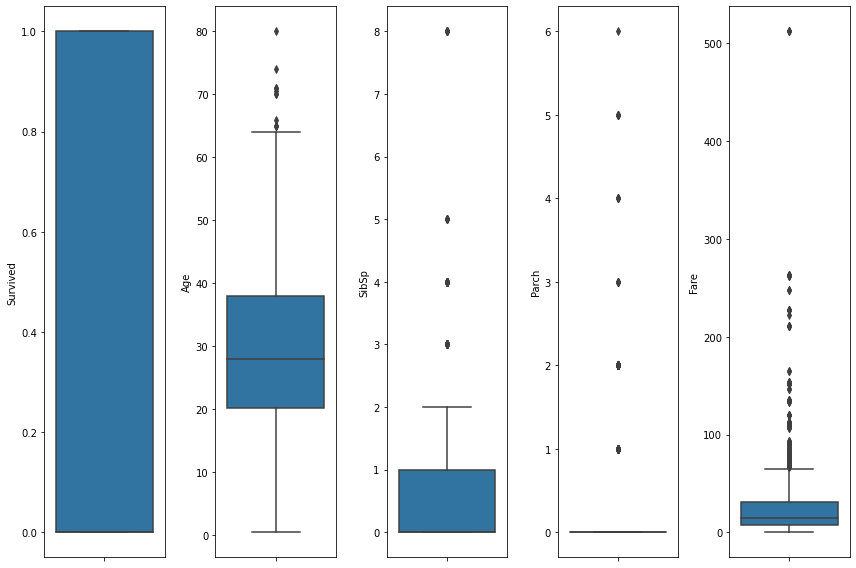

In [94]:
plt.figure(figsize= (12, 8))
for i in range(0, len(nums_col)): # for every value in nums
    plt.subplot(1, len(nums_col), i + 1) #row, columns, index
    sns.boxplot(y=df_train[nums_col[i]], orient ='v')
    plt.tight_layout()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

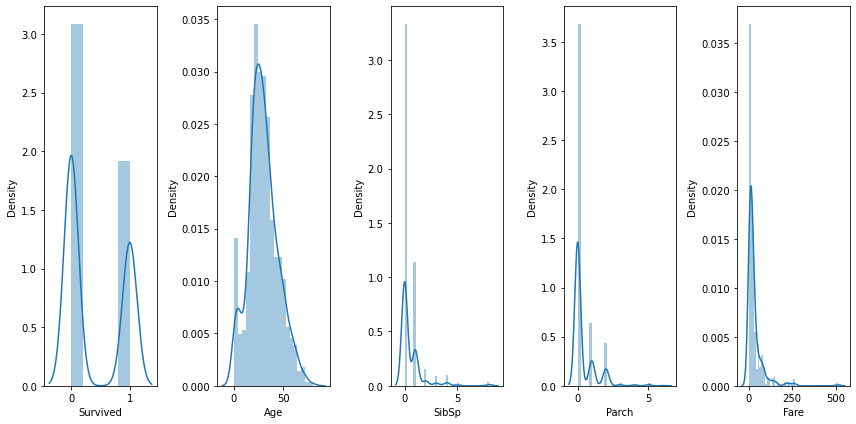

In [95]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums_col)):
    plt.subplot(1, len(nums_col),i + 1)
    sns.distplot(df_train[nums_col[i]])
    plt.tight_layout()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


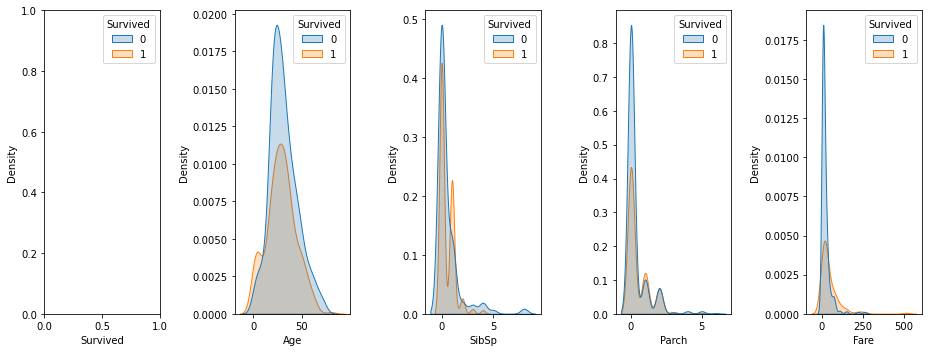

In [96]:
#Data Distribution View to the target
plt.figure(figsize=(13, 5))
for i in range(0, len(nums_col)):
    plt.subplot(1, len(nums_col), i+1)
    sns.kdeplot(data=df_train, x=df_train[nums_col[i]], hue='Survived', fill='True')
    plt.tight_layout()

<ipython-input-97-7cbdccda1a4f>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(nums_col)/2, i+1)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-97-7cbdccda1a4f>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(nums_col)/2, i+1)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and p

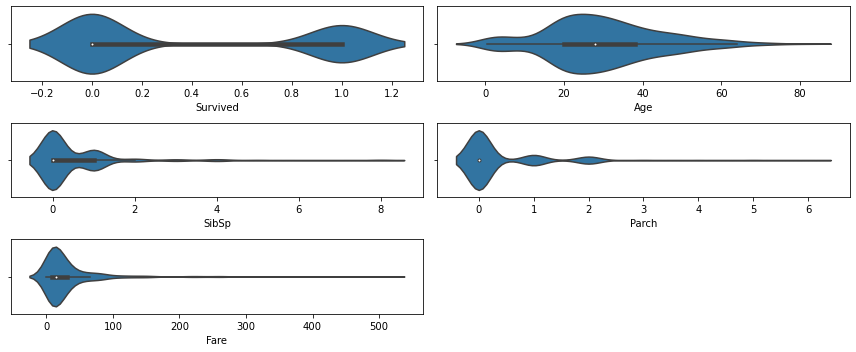

In [97]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums_col)):
    plt.subplot(3, len(nums_col)/2, i+1)
    sns.violinplot(df_train[nums_col[i]])
    plt.tight_layout()

## Count Plot

In [251]:
#create new cabin_class
df_cabin=df_train[['Cabin']].dropna()
Cabin_class=[]
for i in df_cabin.values:
    cabin_class = i[0][0]
    Cabin_class.append(cabin_class)

In [254]:
df_cabin['Cab_Class']=Cabin_class

In [258]:
df_cabin=df_cabin.drop(columns='Cabin')

In [260]:
df_train_new=df_train.merge(df_cabin, left_index= True, right_index= True, how ='outer')
df_train_new.head(5)

,PassengerId,Survived,Tickclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cab_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


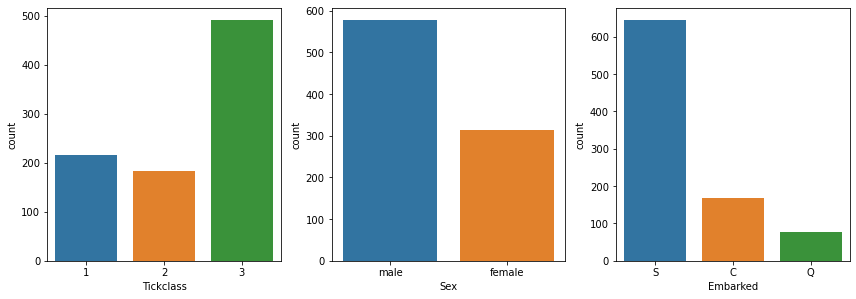

In [98]:
plt.figure(figsize=(12, 12))
for i in range(0, len(cats_plot)):
    plt.subplot(3, 3, i+1)
    sns.countplot(df_train[cats_plot[i]], orient='v')
    plt.tight_layout()

<AxesSubplot:xlabel='Cab_Class', ylabel='count'>

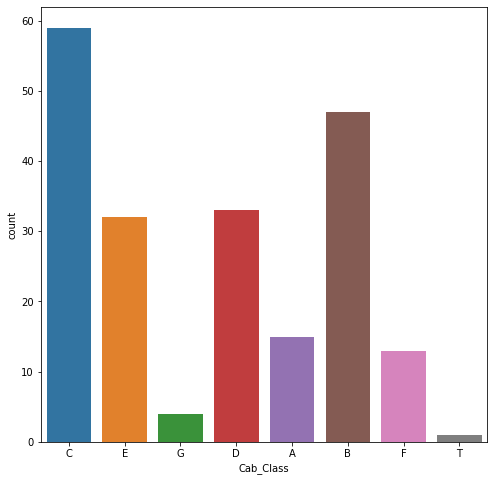

In [261]:
plt.figure(figsize=(8, 8))
sns.countplot(x=df_train_new['Cab_Class'], data=df_train_new)

<AxesSubplot:xlabel='Survived', ylabel='count'>

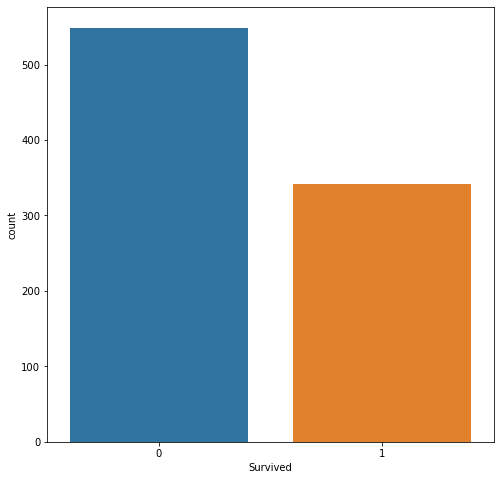

In [121]:
plt.figure(figsize=(8, 8))
sns.countplot(x=df_train['Survived'], data=df_train)

## Multivariate Analysis

In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int32  
 2   Tickclass    891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 80.2+ KB


In [100]:
df_train.sample(10).head(10)

,PassengerId,Survived,Tickclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S


group the cabin and fare

In [101]:
cats_plot

Index(['Tickclass', 'Sex', 'Embarked'], dtype='object')

In [102]:
nums_col

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [103]:
df_train.columns

Index(['PassengerId', 'Survived', 'Tickclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [104]:
number=np.arange(0,650,0+50)
number

array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600])

In [105]:
df_fare = df_train.groupby(['Fare', 'Survived']).agg({'PassengerId' : 'count' }).reset_index()
df_fare.columns = ['Fare', 'Survived', 'Count']
df_fare['Fare_price']=pd.cut(df_fare['Fare'], bins= number, labels= 
                              ['0-50','51-100','101-150','151-200','201-250',
                               '251-300','301-350','351-400','401-450','451-500','501-550','551-600'])
df_fare.head()

,Fare,Survived,Count,Fare_price
0,0.0000,0,14,NaN
1,0.0000,1,1,NaN
2,4.0125,0,1,0-50
3,5.0000,0,1,0-50
4,6.2375,0,1,0-50


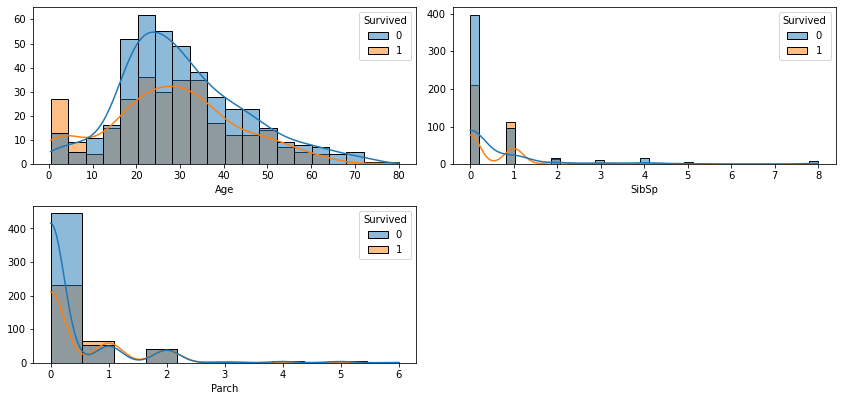

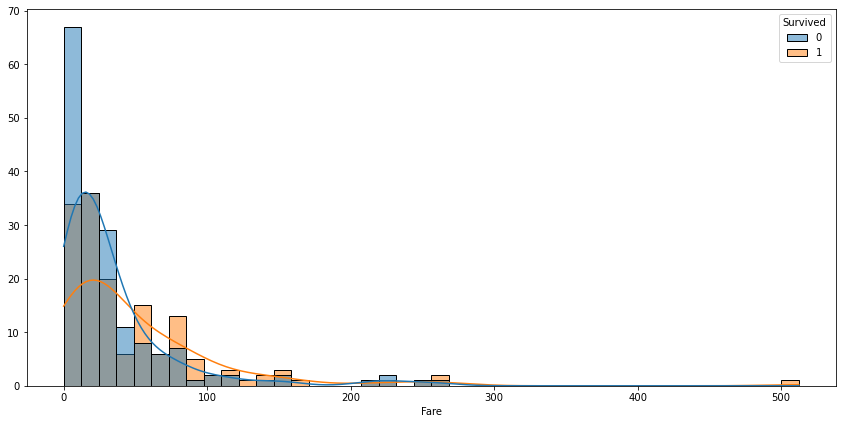

In [106]:
flag2 = ['Age', 'SibSp', 'Parch']

plt.figure(figsize=(12, 8))
for i in range(0, len(flag2)):
    plt.subplot(len(flag2), 2, i+1)
    sns.histplot(data=df_train, x=df_train[flag2[i]], hue=df_train['Survived'], fill=True, kde='True')
    plt.tight_layout()
    plt.ylabel(None)

    
plt.figure(figsize=(12, 6))   
plt.subplot(1, 1, 1)
sns.histplot(data=df_fare, x=df_fare['Fare'], hue=df_fare['Survived'], fill=True, kde='True')
plt.tight_layout()
plt.ylabel(None)
plt.show()

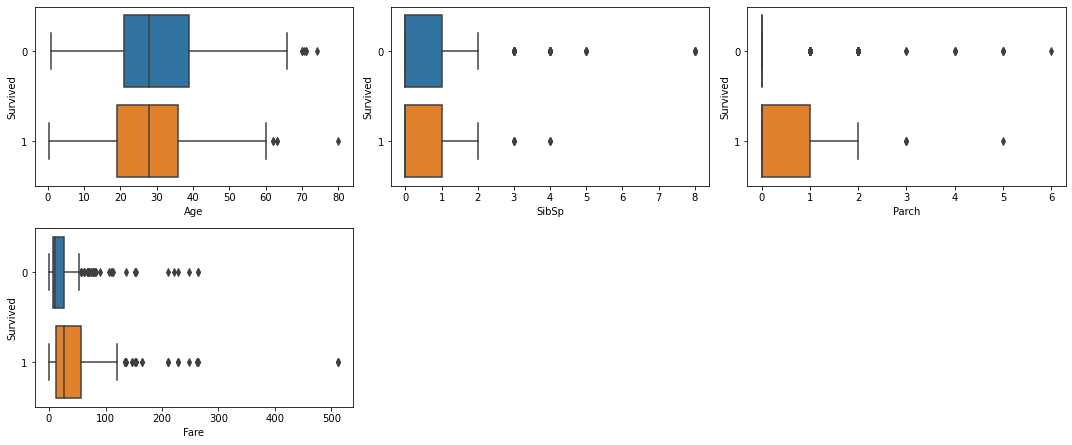

In [107]:
flag3 = ['Age', 'SibSp', 'Parch','Fare']
plt.figure(figsize=(15, 12))
for i in range(0, len(flag3)):
    plt.subplot(len(flag3), 3, i+1)
    sns.boxplot(data=df_train, x=df_train[flag3[i]], y=df_train['Survived'].astype(str))
    plt.tight_layout()

<AxesSubplot:>

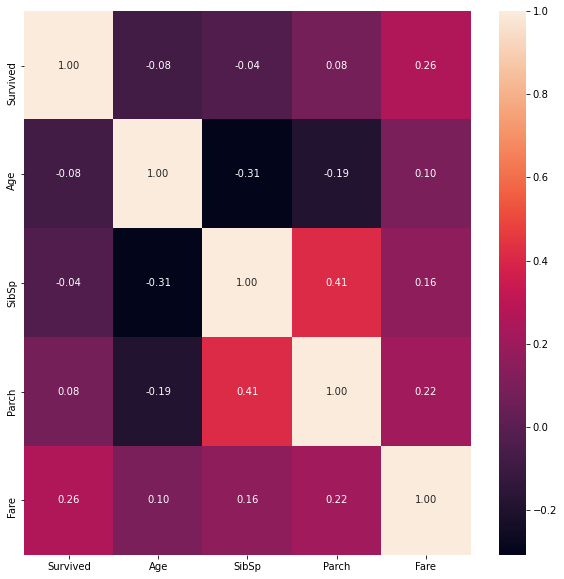

In [108]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr(), annot=True, fmt='.2f')

<Figure size 720x720 with 0 Axes>

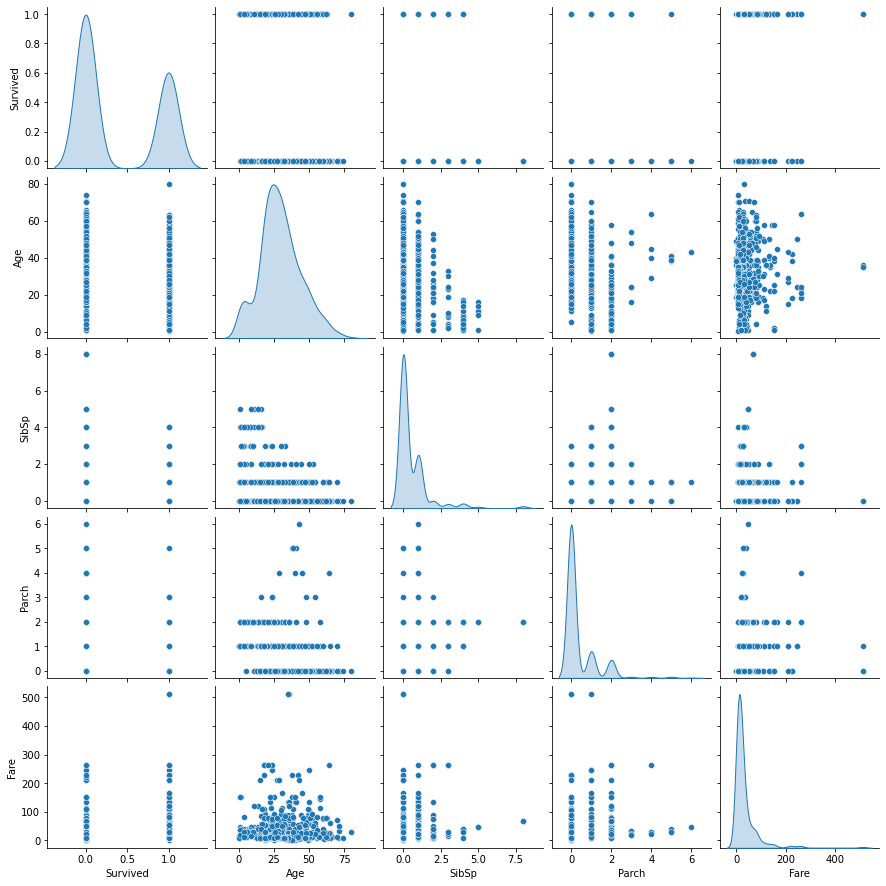

In [110]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_train[nums_col], diag_kind='kde')

In [112]:
cats_plot

Index(['Tickclass', 'Sex', 'Embarked'], dtype='object')

In [115]:
nums_col

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<Figure size 864x576 with 0 Axes>

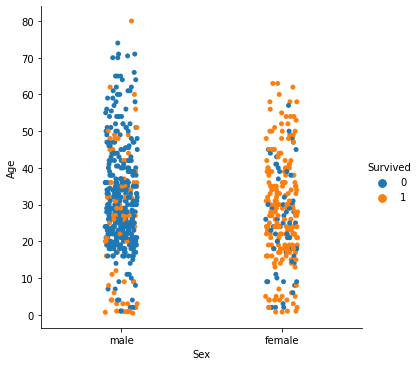

In [119]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Sex', y='Age', hue='Survived', data=df_train)

<Figure size 864x576 with 0 Axes>

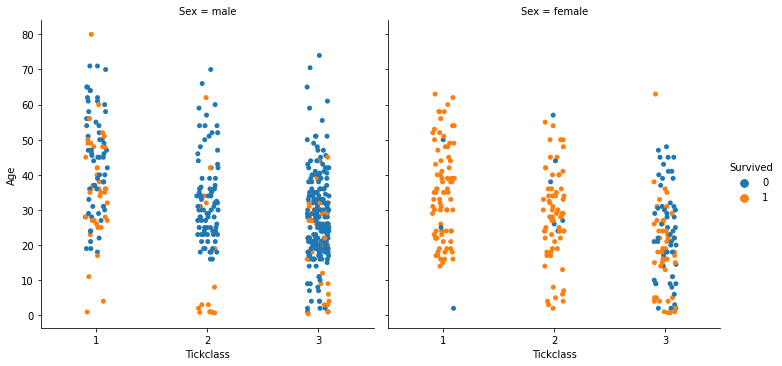

In [117]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Tickclass', y='Age', hue='Survived', col='Sex', data=df_train)

<Figure size 864x576 with 0 Axes>

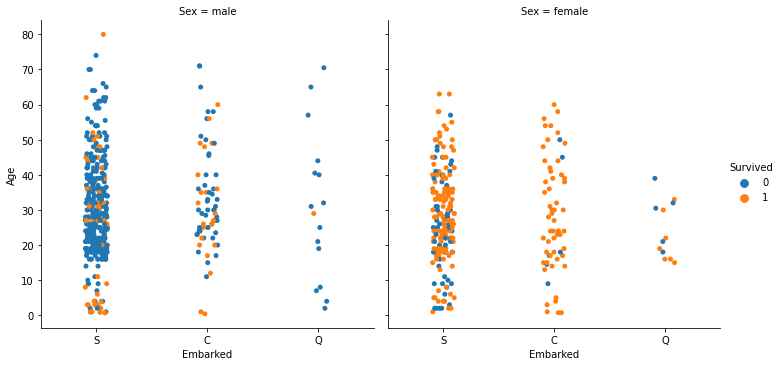

In [118]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Embarked', y='Age', hue='Survived', col='Sex', data=df_train)

<Figure size 864x576 with 0 Axes>

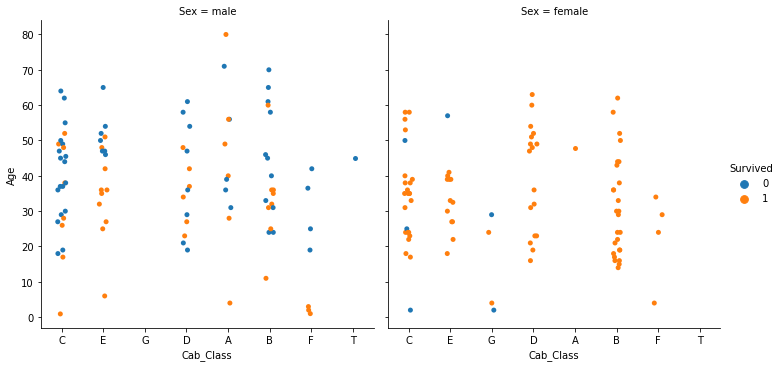

In [263]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Cab_Class', y='Age', hue='Survived', col='Sex', data=df_train_new)